# Analysis of Employee Exit Surveys 

### We are tasked with cleaning and analysis of Employee Exit surveys of the Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia.


## Our goal is to determine the following:
* Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
* Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

## Introduction:

We will begin by reading in both datasets and exploring the data:

In [197]:
# import the appropriate libraries: 
import pandas as pd
import numpy as np

In [198]:
# read in the datasets:
dete_survey = pd.read_csv('dete_survey.csv')
tafe_survey = pd.read_csv('tafe_survey.csv')

## Exploring the Datasets:

### DETE Dataset:

### Initial Exploration:

In [199]:
# a brief exploration of the data:
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   ID                                   822 non-null    int64 
 1   SeparationType                       822 non-null    object
 2   Cease Date                           822 non-null    object
 3   DETE Start Date                      822 non-null    object
 4   Role Start Date                      822 non-null    object
 5   Position                             817 non-null    object
 6   Classification                       455 non-null    object
 7   Region                               822 non-null    object
 8   Business Unit                        126 non-null    object
 9   Employment Status                    817 non-null    object
 10  Career move to public sector         822 non-null    bool  
 11  Career move to private sector        822 non-

In [200]:
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


### Identifying Missing Values:

In [201]:
dete_survey.isnull().sum().sort_values(ascending=False)

Torres Strait                          819
South Sea                              815
Aboriginal                             806
Disability                             799
NESB                                   790
Business Unit                          696
Classification                         367
Opportunities for promotion             87
Career Aspirations                      76
Wellness programs                       56
Coach                                   55
Further PD                              54
Workplace issue                         34
Feedback                                30
Health & Safety                         29
Gender                                  24
Professional Development                14
Stress and pressure support             12
Skills                                  11
Age                                     11
Peer support                            10
My say                                  10
Performance of supervisor                9
Initiative 

### TAFE Dataset:

### Initial Exploration:

In [202]:
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Record ID                                                                                                                                                      702 non-null    float64
 1   Institute                                                                                                                                                      702 non-null    object 
 2   WorkArea                                                                                                                                  

In [203]:
tafe_survey.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


### Identifying Missing Values:

In [204]:
tafe_survey.isnull().sum().sort_values(ascending=False).head(14)

Main Factor. Which of these was the main factor for leaving?     589
InductionInfo. Topic:Did you undertake a Corporate Induction?    270
Contributing Factors. Ill Health                                 265
Contributing Factors. Maternity/Family                           265
Contributing Factors. Career Move - Public Sector                265
Contributing Factors. NONE                                       265
Contributing Factors. Other                                      265
Contributing Factors. Dissatisfaction                            265
Contributing Factors. Career Move - Self-employment              265
Contributing Factors. Career Move - Private Sector               265
Contributing Factors. Travel                                     265
Contributing Factors. Study                                      265
Contributing Factors. Interpersonal Conflict                     265
Contributing Factors. Job Dissatisfaction                        265
dtype: int64

## Preliminary Findings from Exploring both datasets

### dete_survey:

* There are 56 columns in the dete_survey. Most of them are string values. 
* There are a few columns with a high number of missing values:

                Torres Strait   819
                South Sea       815
                Aboriginal      806
                Disability      799
                NESB            790
                Business Unit   696
                Classification  367
                
* The number of missing values might be more as some values are "Not Stated" which may indicate missing values but are not represented as NaN. 
* Some of these columns may not be needed for our analysis.

### tafe_survey:

* Has 72 columns, the structure is clearly different from the dete_survey. 
* They contain similar information, but the column names differ and there are more columns in the tafe_survey. Answers in this survey are more personalised hence more columns. 

On analysis of the missing values, we can see a recurring pattern of the same number of missing values for Contributing factors columns. There might have been a large number of employees to whom those contributing factors did not apply, hence large number of missing values. 


## Read in datasets again and recognise "Not Stated" as missing values

In [205]:
## We will begin by reading in the "Not Stated' values as
## NaN for more accuracy.

dete_survey = pd.read_csv("dete_survey.csv", na_values= "Not Stated")

In [206]:
#reexamine missing values
dete_survey.isnull().sum().sort_values(ascending=False)

Torres Strait                          819
South Sea                              815
Aboriginal                             806
Disability                             799
NESB                                   790
Business Unit                          696
Classification                         367
Region                                 105
Role Start Date                         98
Opportunities for promotion             87
Career Aspirations                      76
DETE Start Date                         73
Wellness programs                       56
Coach                                   55
Further PD                              54
Cease Date                              34
Workplace issue                         34
Feedback                                30
Health & Safety                         29
Gender                                  24
Professional Development                14
Stress and pressure support             12
Skills                                  11
Age        

In [207]:
print(dete_survey.columns[28:49])

Index(['Professional Development', 'Opportunities for promotion',
       'Staff morale', 'Workplace issue', 'Physical environment',
       'Worklife balance', 'Stress and pressure support',
       'Performance of supervisor', 'Peer support', 'Initiative', 'Skills',
       'Coach', 'Career Aspirations', 'Feedback', 'Further PD',
       'Communication', 'My say', 'Information', 'Kept informed',
       'Wellness programs', 'Health & Safety'],
      dtype='object')


In [208]:
print(tafe_survey.columns[17:66])

Index(['Main Factor. Which of these was the main factor for leaving?',
       'InstituteViews. Topic:1. I feel the senior leadership had a clear vision and direction',
       'InstituteViews. Topic:2. I was given access to skills training to help me do my job better',
       'InstituteViews. Topic:3. I was given adequate opportunities for personal development',
       'InstituteViews. Topic:4. I was given adequate opportunities for promotion within %Institute]Q25LBL%',
       'InstituteViews. Topic:5. I felt the salary for the job was right for the responsibilities I had',
       'InstituteViews. Topic:6. The organisation recognised when staff did good work',
       'InstituteViews. Topic:7. Management was generally supportive of me',
       'InstituteViews. Topic:8. Management was generally supportive of my team',
       'InstituteViews. Topic:9. I was kept informed of the changes in the organisation which would affect me',
       'InstituteViews. Topic:10. Staff morale was positive w

## Drop Unneccessary Columns:

In [209]:
#remove columns we dont need:
dete_cols_to_drop = dete_survey.columns[28:49]
dete_survey_updated = dete_survey.drop(dete_cols_to_drop, axis=1)

tafe_cols_to_drop = tafe_survey.columns[17:66]
tafe_survey_updated = tafe_survey.drop(tafe_cols_to_drop, axis=1)

Both dataframes contain many columns that we don't need to complete our analysis.We therefore dropped the columns above to make the dataframes easier to work with.

We will now standardise the column names as many of the columns in both surveys are similar.

In [210]:
#clean remainder column names:
dete_survey_updated.columns = dete_survey_updated.columns.str.lower().str.strip().str.replace('\s+', '_')

In [211]:
#check that columns were dropped and the remainder cleaned:
print(dete_survey_updated.columns)

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')


## Rename Columns

In [212]:
tafe_cols_rename = {'Record ID': 'id',
'CESSATION YEAR': 'cease_date',
'Reason for ceasing employment': 'separationtype',
'Gender. What is your Gender?': 'gender',
'CurrentAge. Current Age': 'age',
'Employment Type. Employment Type': 'employment_status',
'Classification. Classification': 'position',
'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'}

In [213]:
#rename the columns to avoid redundancy:
tafe_survey_updated.rename(tafe_cols_rename, axis=1, inplace=True)

In [214]:
#check that the column names have been renamed:
print(tafe_survey_updated.columns)

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service'],
      dtype='object')


We changed the column name for the dete_survey_updated and renamed the columns in the tafe_survey_updated above to make it easier to work with both dataframes.This will also make it easier to eventually combine the datafarames.

## Filter the Data

In accordance to our goal, to determine "Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?"

We will therefore only analyse survey respondents who resigned. We will focus on the 'Resignation' 'separationtype'.

There are 3 types of resignation seperation types in the dete_survey_updated:

* Resignation-Other reasons
* Resignation-Other employer
* Resignation-Move overseas/interstate


In [215]:
#check for unique values in the seperationtype column:
dete_survey_updated['separationtype'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [216]:
#check for unique values in the seperationtype column:
tafe_survey_updated['separationtype'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

We wil first standardise all Resignation values in the seperationtype column of dete_survey and then filter both datasets that only apply to respondents who resigned:

In [217]:
# changed all resignation types to 'Resignation':
dete_survey_updated['separationtype'] = dete_survey_updated['separationtype'].str.split('-').str[0]

In [218]:
#Check that the above changes were effected:
dete_survey_updated['separationtype'].value_counts() 

Resignation                         311
Age Retirement                      285
Voluntary Early Retirement (VER)     67
Ill Health Retirement                61
Other                                49
Contract Expired                     34
Termination                          15
Name: separationtype, dtype: int64

In [219]:
# We will now filter both datasets to resignation separation type:
dete_resignations = dete_survey_updated.copy()[dete_survey_updated['separationtype']== 'Resignation']
tafe_resignations = tafe_survey_updated.copy()[tafe_survey_updated['separationtype']== 'Resignation']

* We will now clean the cease date columns to check for any inconsistencies that may affect our results.
* Since the cease_date is the last year of the person's employment and the dete_start_date is the person's first year of employment, it wouldn't make sense to have years after the current date.
* Given that most people in this field start working in their 20s, it's also unlikely that the dete_start_date was before the year 1940.


If we have many years higher than the current date or lower than 1940, we wouldn't want to continue with our analysis, because it could mean there's something very wrong with the data. If there are a small amount of values that are unrealistically high or low, we can remove them.

### Checking Years for Logical inconsistencies: Verify Data

In [220]:
dete_resignations['cease_date'].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
11/2013      9
07/2013      9
10/2013      6
08/2013      4
05/2012      2
05/2013      2
2010         1
09/2010      1
07/2012      1
07/2006      1
Name: cease_date, dtype: int64

In [221]:
dete_resignations['dete_start_date'].value_counts().sort_values()

1963.0     1
1971.0     1
1972.0     1
1984.0     1
1977.0     1
1987.0     1
1975.0     1
1973.0     1
1982.0     1
1974.0     2
1983.0     2
1976.0     2
1986.0     3
1985.0     3
2001.0     3
1995.0     4
1988.0     4
1989.0     4
1991.0     4
1997.0     5
1980.0     5
1993.0     5
1990.0     5
1994.0     6
2003.0     6
1998.0     6
1992.0     6
2002.0     6
1996.0     6
1999.0     8
2000.0     9
2013.0    10
2009.0    13
2006.0    13
2004.0    14
2005.0    15
2010.0    17
2012.0    21
2007.0    21
2008.0    22
2011.0    24
Name: dete_start_date, dtype: int64

In [222]:
# lets first clean the cease dates in the dete_resignations and convert to float:
dete_resignations['cease_date'] = dete_resignations['cease_date'].str.split('/').str[-1]
dete_resignations['cease_date'] = dete_resignations['cease_date'].astype('float')

In [223]:
# check if the above changes have been effected:
dete_resignations['cease_date'].value_counts().sort_values()

2006.0      1
2010.0      2
2014.0     22
2012.0    129
2013.0    146
Name: cease_date, dtype: int64

In [224]:
# inspect dete start date:
dete_resignations['dete_start_date'].value_counts().sort_values()

1963.0     1
1971.0     1
1972.0     1
1984.0     1
1977.0     1
1987.0     1
1975.0     1
1973.0     1
1982.0     1
1974.0     2
1983.0     2
1976.0     2
1986.0     3
1985.0     3
2001.0     3
1995.0     4
1988.0     4
1989.0     4
1991.0     4
1997.0     5
1980.0     5
1993.0     5
1990.0     5
1994.0     6
2003.0     6
1998.0     6
1992.0     6
2002.0     6
1996.0     6
1999.0     8
2000.0     9
2013.0    10
2009.0    13
2006.0    13
2004.0    14
2005.0    15
2010.0    17
2012.0    21
2007.0    21
2008.0    22
2011.0    24
Name: dete_start_date, dtype: int64

In [225]:
# check unique dates for tafe_resignations:
tafe_resignations['cease_date'].value_counts()

2011.0    116
2012.0     94
2010.0     68
2013.0     55
2009.0      2
Name: cease_date, dtype: int64

The dates in both dataframes donot coincide. In some years there are values for tafe_resignations and none for dete_resignations, vice versa.For our analysis, we will ignore the years that have significantly fewer employees resigning that year and focus on years from 2010 onwards.


As per our goal, we need to determine the years of service by each employee in both dataframes:

Recall our goal:
Are employees who have only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been at the job longer?

We will therefore include a new column with service years.The tafe_resignations dataframe already contains a "service" column, which we renamed to institute_service.

Below, we calculate the years of service in the dete_survey_updated dataframe by subtracting the dete_start_date from the cease_date and create a new column named institute_service.

In [226]:
dete_resignations['institute_service'] = dete_resignations['cease_date'] - dete_resignations['dete_start_date']

In [227]:
#checking the service years of resigned respondents:
dete_resignations['institute_service'].head()

3      7.0
5     18.0
8      3.0
9     15.0
11     3.0
Name: institute_service, dtype: float64

## Identify Dissatisfied Employees:

Below are the columns we'll use to categorize employees as "dissatisfied" from each dataframe. 

tafe_survey_updated:
Contributing Factors. Dissatisfaction
Contributing Factors. Job Dissatisfaction


dete_survey_updated:
job_dissatisfaction
dissatisfaction_with_the_department
physical_work_environment
lack_of_recognition
lack_of_job_security
work_location
employment_conditions
work_life_balance
workload

If the employee indicated any of the factors above caused them to resign, we'll mark them as dissatisfied in a new column.

After our changes, the new dissatisfied column will contain just the following values:

True: indicates a person resigned because they were dissatisfied with the job:
False: indicates a person resigned because of a reason other than dissatisfaction with the job
NaN: indicates the value is missing

In [228]:
# first we'll view the unique values in the tafe_resignations columns above:
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts()

-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [229]:
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts()

-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [262]:
# we will now write a function to update the values in the tafe_resignation columns, to contain True, False or NaN:
def update_vals(x):
    if x == '-':
        return False
    elif pd.isnull(x):
        return np.nan
    else:
        return True

tafe_resignations['dissatisfied'] = tafe_resignations[['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']].applymap(update_vals).any(1, skipna=False)
tafe_resignations_up = tafe_resignations.copy()    
    


In [263]:
# check the unique values of the new column:
tafe_resignations_up['dissatisfied'].value_counts(dropna=False)

False    241
True      91
NaN        8
Name: dissatisfied, dtype: int64

There are 91 respondents dissatisfied with their jobs according to the tafe_resignations.

In [264]:
columns_update = ['job_dissatisfaction', 'dissatisfaction_with_the_department',
           'physical_work_environment','lack_of_recognition',
           'lack_of_job_security','work_location',
            'employment_conditions','work_life_balance',
            'workload']
dete_resignations['dissatisfied'] = dete_resignations[columns_update].applymap(update_vals).any(1, skipna=False)
dete_resignations_up = dete_resignations.copy()

In [265]:
dete_resignations_up['dissatisfied'].value_counts(dropna=False)

True    311
Name: dissatisfied, dtype: int64

To recap, we've accomplished the following:

Renamed our columns
Dropped any data not needed for our analysis
Verified the quality of our data
Created a new institute_service column
Cleaned the Contributing Factors columns
Created a new column indicating if an employee resigned because they were dissatisfied in some way
Now, we're finally ready to combine our datasets! Our end goal is to aggregate the data according to the institute_service column, so when you combine the data, think about how to get the data into a form that's easy to aggregate.

In [266]:
#First, let's add a column to each dataframe that will allow us to 
#easily distinguish between the two once combined.
dete_resignations_up['institute'] = 'DETE'

In [267]:
tafe_resignations_up['institute'] = 'TAFE'

In [268]:
# combine the dataframes:
combined = pd.concat([dete_resignations_up, tafe_resignations_up], ignore_index=True)

In [269]:
# Verify the number of non null values in each column:
combined.notnull().sum().sort_values()

torres_strait                                            0
south_sea                                                3
aboriginal                                               7
disability                                               8
nesb                                                     9
business_unit                                           32
classification                                         161
region                                                 265
role_start_date                                        271
dete_start_date                                        283
role_service                                           290
none_of_the_above                                      311
work_life_balance                                      311
traumatic_incident                                     311
ill_health                                             311
study/travel                                           311
relocation                                             3

In [270]:
# drop unnecessary columns, with less than 500 non-null values:
combined_updated = combined.copy().dropna(thresh=500, axis=1)

We've combined our dataframes, before we can perform some kind of analysis, we must first clean up the institute_service column. This column currently contains values in a couple different forms.

Let's categorize the values in the institute_service column using the definitions below:

      New: Less than 3 years at a company 
      Experienced: 3-6 years at a company
      Established: 7-10 years at a company
      Veteran: 11 or more years at a company
      
Our analysis is based on '<a href="https://www.businesswire.com/news/home/20171108006002/en/Age-Number-Engage-Employees-Career-Stage">this</a>' article, which makes the argument that understanding employee's needs according to career stage instead of age is more effective.

In [271]:
# check for unique values
combined_updated['institute_service'].value_counts()

Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
3.0                   20
0.0                   20
6.0                   17
4.0                   16
9.0                   14
2.0                   14
7.0                   13
More than 20 years    10
13.0                   8
8.0                    8
20.0                   7
15.0                   7
14.0                   6
17.0                   6
12.0                   6
10.0                   6
22.0                   6
18.0                   5
16.0                   5
24.0                   4
23.0                   4
11.0                   4
39.0                   3
19.0                   3
21.0                   3
32.0                   3
36.0                   2
25.0                   2
26.0                   2
28.0                   2
30.0                   2
42.0                   1


## Categorise Service Column:

In [272]:
#First, extract years of service from each value in the institute_service 
#column. Begin by converting values to strings, extracting the years(digits)
#and saving it to a new column, therafter update the values by converting 
#to float type

# recall we converted it to string to use vectorised string methods to extract the years
patterns = r"(\d+)"
combined_updated['institute_service_up'] = combined_updated['institute_service'].astype('str').str.extract(patterns)
combined_updated['institute_service_up'] = combined_updated['institute_service_up'].astype('float')

In [273]:
#check for unique values
combined_updated['institute_service_up'].value_counts(dropna=False)

1.0     159
NaN      88
3.0      83
5.0      56
7.0      34
11.0     30
0.0      20
20.0     17
6.0      17
4.0      16
9.0      14
2.0      14
13.0      8
8.0       8
15.0      7
22.0      6
10.0      6
17.0      6
14.0      6
12.0      6
16.0      5
18.0      5
24.0      4
23.0      4
21.0      3
39.0      3
32.0      3
19.0      3
36.0      2
30.0      2
25.0      2
26.0      2
28.0      2
42.0      1
29.0      1
35.0      1
27.0      1
41.0      1
49.0      1
38.0      1
34.0      1
33.0      1
31.0      1
Name: institute_service_up, dtype: int64

In [274]:
#confirm null values before categorise the service years:
combined_updated['institute_service_up'].isnull().sum()

88

In [275]:
#create a function to categorise the service years 
#and save them to a new column: 
def category(x):
    if x >= 11:
        return 'Veteran'
    elif 7 <= x < 11:
        return 'Established'
    elif 3 <= x < 6:
        return 'Experienced'
    elif pd.isnull(x):
        return np.NaN
    else:
        return 'New'
    
combined_updated['service_cat'] = combined_updated['institute_service_up'].apply(category) 
combined_updated['service_cat'].value_counts()

New            210
Experienced    155
Veteran        136
Established     62
Name: service_cat, dtype: int64

This will allow us to establish the number of resignations per category.


Recall that the dissatisfied column consists of Boolean values, meaning they're either True or False. 

Methods such as the df.pivot_table() method actually treat Boolean values as integers, so a True value is considered to be 1 and a False value is considered to be 0. 

That means that we can aggregate the dissatisfied column and calculate the number of people in each group, the percentage of people in each group, etc.

In [276]:
# determine the no. of True, False and missing values:
combined_updated['dissatisfied'].value_counts(dropna=False)

True     402
False    241
NaN        8
Name: dissatisfied, dtype: int64

In [277]:
# save the value counts:
counts = combined_updated['dissatisfied'].value_counts(dropna=False)

In [278]:
#update the missing values in the dissastisfied column with the most frequent 
#or highest value count 'value' for ie.True by using counts.idxmax() where counts contains the value counts above:

combined_updated['dissatisfied'] = combined_updated['dissatisfied'].fillna(counts.idxmax())

# alternative: .fillna(False) as we already know the most frequent value

Now that our missing values in the dissatisfied column are filled, we can calculate the percentage of dissatisfied employees per service category and plot a bar graph to get a visual understanding of the connection.

In [279]:
import matplotlib.pyplot as plt
%matplotlib inline

In [280]:
# Calculate the percentage of employees who resigned due to dissatisfaction in each category
diss_percentage = combined_updated.pivot_table(index='service_cat', values='dissatisfied')

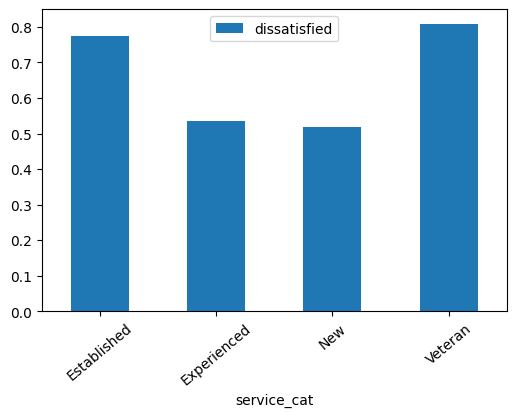

In [282]:
# plot the results:
diss_percentage.plot(kind='bar', rot=40)

From the initial analysis above, we can tentatively conclude that employees with 7 or more years of service are more likely to resign due to some kind of dissatisfaction with the job than employees with less than 7 years of service. However, we need to handle the rest of the missing data to finalize our analysis.